In [31]:
import matplotlib.pyplot as plt
import numpy as np
import hail as hl
import matplotlib.ticker as ticker

In [2]:
hl.init()

Running on Apache Spark version 2.2.0
SparkUI available at http://10.1.7.107:4042
Welcome to
     __  __     <>__
    / /_/ /__  __/ /
   / __  / _ `/ / /
  /_/ /_/\_,_/_/_/   version devel-47a3ae6598a3
NOTE: This is a beta version. Interfaces may change
  during the beta period. We recommend pulling
  the latest changes weekly.


In [4]:
table_path='/Users/maccum/manhattan/data/caffeine.ht'

t = hl.read_table(table_path)

In [5]:
t.describe()

----------------------------------------
Global fields:
    'color_dict': dict<str, str> 
----------------------------------------
Row fields:
    'global_position': int64 
    'neg_log_pval': float64 
    'color': str 
----------------------------------------
Key: ['global_position']
----------------------------------------


In [6]:
collected = t.collect()
gp = []
nlp = []
colors = []
for i in range(0, len(collected)):
    gp.append(collected[i].global_position)
    nlp.append(collected[i].neg_log_pval)
    colors.append(collected[i].color)

In [12]:
x_range = [min(gp)-5, max(gp)+5]
y_range = [0, max(nlp)+1]

Axes(0,0;1x1)


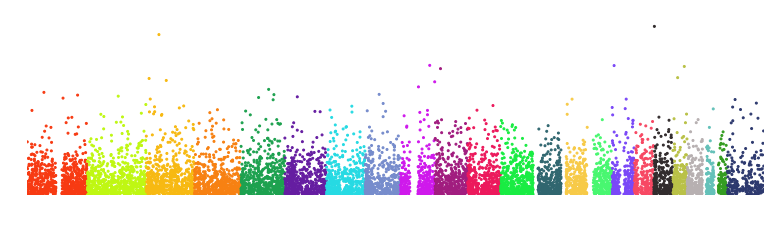

In [17]:
fig = plt.figure(figsize=(2.56*4, 2.56))
ax = fig.add_axes([0,0,1,1])
ax.set_axis_off()
ax.scatter(gp, nlp, c=colors, s=4)
ax.set_ylim(y_range)
ax.set_xlim(x_range)

tile_file_path = '/Users/maccum/manhattan/temp/test.png'
plt.savefig(tile_file_path, dpi=100)
plt.show()
plt.close()

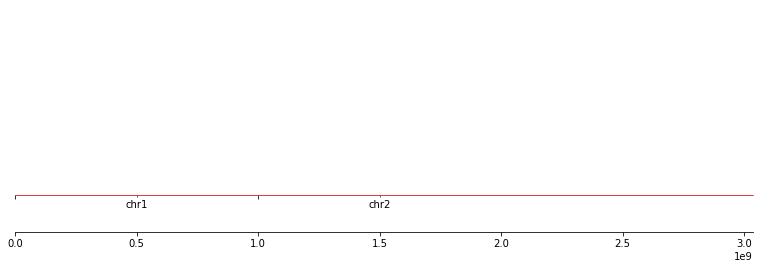

In [83]:
fig = plt.figure(figsize=(2.56*4, 2.56))
ax = fig.add_axes([0,0,1,1], label='positions')
ax.axes.get_yaxis().set_visible(False)
ax.set_xlim(x_range)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

# Second X-axis
#ax_chromosome = ax.twiny()
#offset = 0, -25 # Position of the second axis
#new_axisline = ax_chromosome.get_grid_helper().new_fixed_axis
#ax_chromosome.axis["bottom"] = new_axisline(loc="bottom", axes=ax_chromosome, offset=offset)
#ax_chromosome.axis["top"].set_visible(False)

#ax_chromosome.set_xticks([0.0, 0.6, 1.0])
#ax_chromosome.xaxis.set_major_formatter(ticker.NullFormatter())
#ax_chromosome.xaxis.set_minor_locator(ticker.FixedLocator([0.5e9, 1.5e9]))
#ax_chromosome.xaxis.set_minor_formatter(ticker.FixedFormatter(['mammal', 'reptiles']))

#pos = ax_chromosome.get_position()
#ax_chromosome.set_position([pos.x0, pos.y0 -.5,  pos.width, pos.height] )

#ax_chromosome.spines['top'].set_visible(False)
#ax_chromosome.spines['right'].set_visible(False)
#ax_chromosome.spines['left'].set_visible(False)
#ax_chromosome.spines['bottom'].set_color('#c61717')

ax2 = fig.add_axes([0,0,1,1], label='chromosomes')
ax2.axes.get_yaxis().set_visible(False)
ax2.set_xlim(x_range)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.spines['bottom'].set_color('#c61717')
pos = ax2.get_position()
ax2.set_position([pos.x0, pos.y0 +.2,  pos.width, pos.height] )

ax2.get_xaxis().set_major_locator(ticker.FixedLocator([0,1e9]))
ax2.get_xaxis().set_major_formatter(ticker.NullFormatter())

ax2.get_xaxis().set_minor_locator(ticker.FixedLocator([0.5e9, 1.5e9]))
ax2.get_xaxis().set_minor_formatter(ticker.FixedFormatter(['chr1', 'chr2']))

plt.show()
plt.close()